In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Prepare input data for deep learning
# Load data into pandas dataframe
# Convert the dataframe into a numpy array
# Scale the feature dataset
# Use onehot encoding for the target variable
# Split the dataset into training and test datasets

In [6]:
# Load data adn review content

iris_data = pd.read_csv("iris.csv")
print(iris_data.head())

# Use Label encoder to convert String to numeric values for the target variable
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
iris_data['Species'] = label_encoder.fit_transform(iris_data['Species'])
print(iris_data.head())

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  Species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


In [7]:
# Converting input to numpy array
np_iris = iris_data.to_numpy()
print(np_iris.shape)

# Separate features and target variables
X_data = np_iris[:,0:4]
Y_data = np_iris[:,4]

print("\nFeatures before scaling: \n-------------------------------------------------")
print(X_data[:5, :])
print("\nTarget before scaling: \n---------------------------------------------------")
print(Y_data[:5])

(150, 5)

Features before scaling: 
-------------------------------------------------
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Target before scaling: 
---------------------------------------------------
[0. 0. 0. 0. 0.]


In [11]:
# Create a standard scaler object that is fit on the input data
scaler = StandardScaler().fit(X_data)

# Scale the numeric feature variable
X_data = scaler.transform(X_data)

# Convert target variable as a one-hot ended array
Y_data = tf.keras.utils.to_categorical(Y_data, 3)

print("\nFeatures after scaling: \n-------------------------------------------------")
print(X_data[:5, :])
print("\nTarget after scaling: \n---------------------------------------------------")
print(Y_data[:5])


Features after scaling: 
-------------------------------------------------
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]

Target after scaling: 
---------------------------------------------------
[[[0. 1. 0.]
  [1. 0. 0.]
  [1. 0. 0.]]

 [[0. 1. 0.]
  [1. 0. 0.]
  [1. 0. 0.]]

 [[0. 1. 0.]
  [1. 0. 0.]
  [1. 0. 0.]]

 [[0. 1. 0.]
  [1. 0. 0.]
  [1. 0. 0.]]

 [[0. 1. 0.]
  [1. 0. 0.]
  [1. 0. 0.]]]


In [10]:
# Splitting the data into training and testing data

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.10)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(135, 4) (15, 4) (135, 3) (15, 3)


In [12]:
#### Neural Network Model ####

# 1. Create a Model
# 2. number of hidden layers
# 3. number of nodes in each layer
# 4. activation functions
# 5. Loss function and accuracy measurements

In [14]:
from tensorflow import keras

# Number of classes in target variable
NB_CLASSES = 3

# create a sequential model in keras
model = tf.keras.models.Sequential()

# add the first hidden layer
model.add(keras.layers.Dense(128, # Number of nodes
                             input_shape = (4,), # number of input variables
                             name = "Hidden-Layer-1", # Logical name
                             activation = 'relu')) # activation function
                             
# Add the second hidden layer
model.add(keras.layers.Dense(128, # Number of nodes
                             name = "Hidden-Layer-12", # Logical name
                             activation = 'relu')) # activation function

# Add an output layer with softmax function
model.add(keras.layers.Dense(NB_CLASSES,
                             name = 'Output-Layer',
                             activation = 'softmax'))

# Compile the model with loss and metrics
model.compile(loss = 'categorical_crossentropy',
             metrics= ['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-12 (Dense)     (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________



Training Progress: 
------------------------------------------------
Epoch 1/20
7/7 [==============================] - 6s 52ms/step - loss: 0.7930 - accuracy: 0.7778 - val_loss: 0.5514 - val_accuracy: 0.8519
Epoch 2/20
7/7 [==============================] - 0s 8ms/step - loss: 0.4960 - accuracy: 0.8426 - val_loss: 0.4197 - val_accuracy: 0.8148
Epoch 3/20
7/7 [==============================] - 0s 7ms/step - loss: 0.3909 - accuracy: 0.8704 - val_loss: 0.3660 - val_accuracy: 0.8148
Epoch 4/20
7/7 [==============================] - 0s 7ms/step - loss: 0.3339 - accuracy: 0.8981 - val_loss: 0.3323 - val_accuracy: 0.8519
Epoch 5/20
7/7 [==============================] - 0s 8ms/step - loss: 0.2937 - accuracy: 0.8704 - val_loss: 0.2954 - val_accuracy: 0.8148
Epoch 6/20
7/7 [==============================] - 0s 7ms/step - loss: 0.2645 - accuracy: 0.8704 - val_loss: 0.2765 - val_accuracy: 0.8148
Epoch 7/20
7/7 [==============================] - 0s 7ms/step - loss: 0.2365 - accuracy: 0.9074 - val

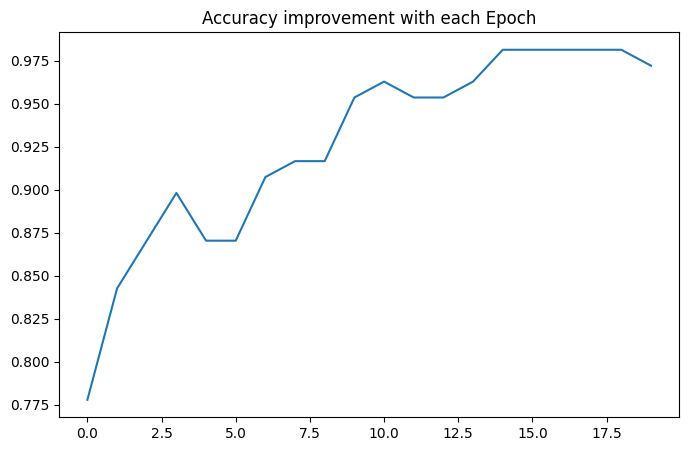


Evaluate against the test dataset: 
--------------------------------------
1/1 [==============================] - 0s 26ms/step - loss: 0.4137 - accuracy: 0.8667


[0.41370248794555664, 0.8666666746139526]

In [16]:
# Training and evaluating the model

# Make it verbose so we can see the process
VERBOSE = 1

# Set hyperparameters for training

# Set batch size
BATCH_SIZE = 16

# Set the number of epochs
EPOCHS = 20

# Set the validation split. 20% of the training dataset will be sued for validation
VALIDATION_SPLIT = 0.2

print('\nTraining Progress: \n------------------------------------------------')

# Fitting the model. This will perform the entire training cycle, including forward propagation,
# loss computation, backward propagation and gradient descent
# It is executed for the specified batch sizes and epochs
# and perform validation after each epoch

history = model.fit(X_train,
                   Y_train,
                   batch_size=BATCH_SIZE,
                   epochs=EPOCHS,
                   verbose=VERBOSE,
                   validation_split=VALIDATION_SPLIT)

print("\nAccuracy during training: \n---------------------------------------------")

# Plot the accuracy of the model after each epoch

pd.DataFrame(history.history)['accuracy'].plot(figsize=(8,5))
plt.title("Accuracy improvement with each Epoch")
plt.show()

# Evaluate the model against the test dataset and print the result

print("\nEvaluate against the test dataset: \n--------------------------------------")

model.evaluate(X_test, Y_test)

In [18]:
# Saving the model
model.save("iris_save")

# Load the model
loaded_model = keras.models.load_model("iris_save")

# print the model summary
loaded_model.summary()

INFO:tensorflow:Assets written to: iris_save\assets


INFO:tensorflow:Assets written to: iris_save\assets


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-12 (Dense)     (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Predictions with deep learning model

# Raw prediction data

prediction_input = [[8.6, 9., 12.4, 6.4]]

# scale the prediction data with some scaling object
scaled_input = scaler.transform(prediction_input)

# get the raw prediction probabilities
raw_prediction = loaded_model.predict(scaled_input)
print("Raw Prediction Output (Probabilities):",raw_prediction)

# Find prediction
prediction = np.argmax(raw_prediction)
print('Prediction is', label_encoder.inverse_transform([prediction]))

1/1 [==============================] - 0s 24ms/step
Raw Prediction Output (Probabilities): [[4.700125e-36 8.803273e-18 1.000000e+00]]
Prediction is ['virginica']
